**Table of Contents**

>[Loading dataset](#scrollTo=p3RrdxdydHT0)

>[Getting familiar with dataset](#scrollTo=i031HDDzmCw5)

>[Cleaning dataset](#scrollTo=Ufh_FnFV4d_S)

>[Exploratory Data Analysis](#scrollTo=JniB82NeEJ_C)

>>[Correlation](#scrollTo=FqPD7oinNE7K)

>>[Distributions](#scrollTo=VEQskYIgNCj-)

>>[Question and Answer About The Data](#scrollTo=nR1L8WySuGny)



#**Loading dataset**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/EDA/tmdb_5000_movies.csv')

Our dataset is like:

In [3]:
dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

#**Getting familiar with dataset**

**How many features does the dataset have? and what are those?**


In [5]:
print('The columns(features) are:\n',dataset.columns[1:100])
print('---------------------')
print('Columns size is :',dataset.columns.size)

The columns(features) are:
 Index(['genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
---------------------
Columns size is : 20


**How many movies are exist in the dataset?**

In [6]:
print('Number of Movies: ', dataset['title'].dropna().unique().size)

Number of Movies:  4800


#**Cleaning dataset**

**Removing null features(columns)**

In [7]:
dataset.apply(lambda x: sum(x.isna()), axis=0)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
print((dataset[dataset['homepage'].isnull() == True].shape[0] / dataset['title'].dropna().unique().size)*100)

64.39583333333333


We can see that the 'homepage' feature is null in almost `print((dataset['title'].size / dataset[dataset['homepage'].isnull() == True].shape[0])*100)` 64 percent of the 'homepage' column, so it's useless and we can remove it.
We can also do this process for the 'tagline' column.

In [9]:
dataset.drop(['homepage','tagline'], axis=1, inplace= True)

**Removing features with zero values**

In [11]:
dataset.apply(lambda x: sum(x==0) ,axis=0)

budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
title                      0
vote_average              63
vote_count                62
dtype: int64

In [12]:
cleaned_data = dataset[dataset.budget > 0]
cleaned_data = cleaned_data[cleaned_data.revenue > 0]
cleaned_data = cleaned_data[cleaned_data.vote_count > 0]

After removing we have:

In [13]:
cleaned_data.apply(lambda x: sum(x==0) ,axis=0)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

And Also:

In [14]:
dataset.apply(lambda x: sum(x.isna()), axis=0)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [15]:
cleaned_data

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a dev

**Handling Jason format column**

In [16]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for col in columns:
  cleaned_data[col] = cleaned_data[col].apply(json.loads)

Now we have dictionaries in some columns instead of JSON files. this makes our work easier.

In the next step, we want to extract the names of these columns, because any other information is useless.

In [17]:
for col in columns:
  cleaned_data[col] = cleaned_data[col].map(lambda x:[item['name'] for item in x])

We almost cleaned our dataset, but we should do more manipulation.

We want to see 'Are there some movies with a similar title ?'

In [19]:
title_duplicate = cleaned_data.groupby('title')
title_duplicate = title_duplicate.title.count()
title_duplicate[title_duplicate > 1]

title
The Host    2
Name: title, dtype: int64

We found 2 movies with same name, lets change their titles

In [20]:
cleaned_data[cleaned_data['title'] == "The Host"]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
972,44000000,"[Action, Adventure, Romance, Science Fiction, ...",72710,"[based on novel, mass murder, dystopia, genoci...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[Nick Wechsler Productions, Open Road Films, S...",[United States of America],2013-03-22,63327201,125.0,[English],Released,The Host,6.0,1817
2877,11000000,"[Horror, Drama, Science Fiction]",1255,"[river, mobile phone, bravery, archer, daughte...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[Cineclick Asia, Happinet Pictures, Cheongeora...",[South Korea],2006-07-27,88489643,119.0,[한국어/조선말],Released,The Host,6.7,537


In [21]:
cleaned_data.title = cleaned_data.apply(lambda row: row.title + '_' + str(row.release_date) if (row.title == 'The Host') else row.title,axis = 1)

We used the release date to separate the two movies which had the same name

And finally our data is like

In [22]:
cleaned_data

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,[Comedy],2292,"[salesclerk, loser, aftercreditsstinger]",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[Miramax Films, View Askew Productions]",[United States of America],1994-09-13,3151130,92.0,[English],Released,Clerks,7.4,755
4788,12000,"[Horror, Comedy, Crime]",692,"[gay, trailer park, pop culture, drug dealer, ...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,[Dreamland Productions],[United States of America],1972-03-12,6000000,93.0,[English],Released,Pink Flamingos,6.2,110
4792,20000,"[Crime, Horror, Mystery, Thriller]",36095,"[japan, prostitute, hotel, based on novel, hal...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,[Daiei Studios],[Japan],1997-11-06,99000,111.0,[日本語],Released,Cure,7.4,63
4796,7000,"[Science Fiction, Drama, Thriller]",14337,"[distrust, garage, identity crisis, time trave...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,[Thinkfilm],[United States of America],2004-10-08,424760,77.0,[English],Released,Primer,6.9,658


#**Exploratory Data Analysis**

## Correlation

First of all, let's see how relevant the variables are

<ipython-input-23-cda4c0c5715d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), cmap="YlGnBu", annot=True)


<Axes: >

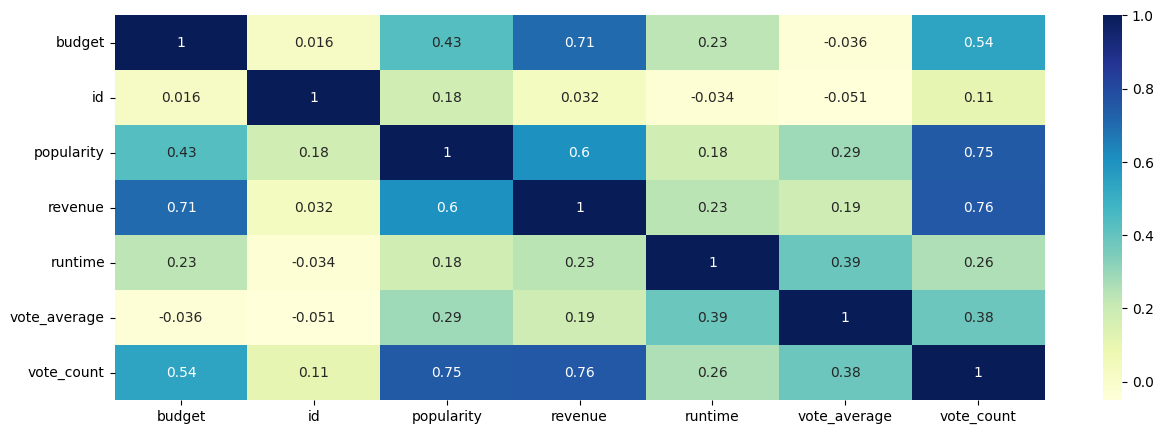

In [23]:
fig, ax =plt.subplots(figsize=(15,5))
sns.heatmap(cleaned_data.corr(), cmap="YlGnBu", annot=True)

**Interesting Results:**

1- revenue and vote_count have a high correlation MEANS THAT The more revenue, the more vote

2- popularity and vote_count have a high correlation MEANS THAT The more popularity the more vote

3- revenue and budget have a high correlation MEANS THAT The more budget, the more revenue

## Distributions

In this section, we will discover the distributions of some continuous variables. you can find how movie features like revenue and budget are distributed.

Budget Distribution

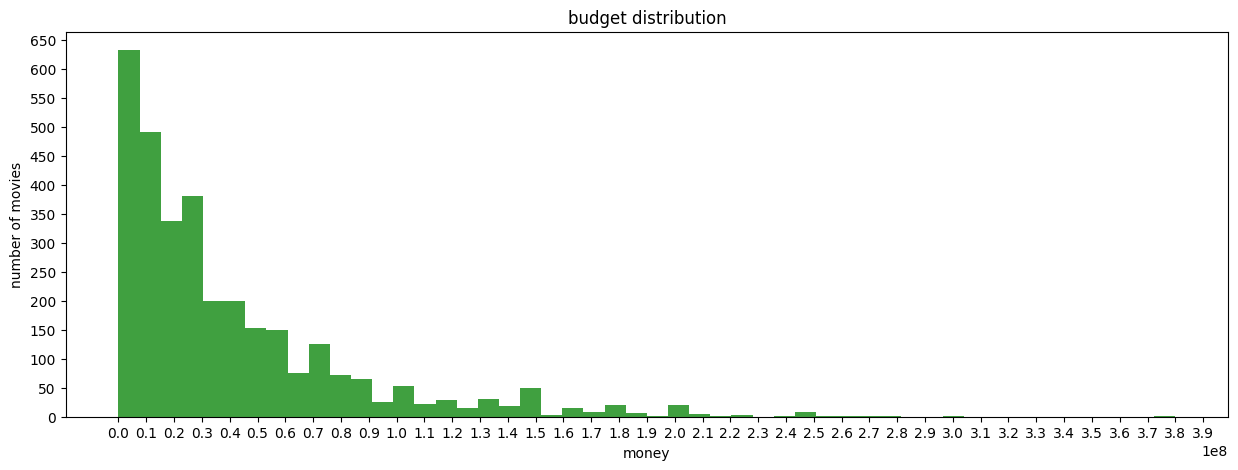

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(cleaned_data['budget'], color="green", bins=50, alpha=0.75, rwidth=1)
plt.ylabel("number of movies")
plt.xlabel("money")
plt.title('budget distribution')
plt.yticks(np.arange(0,700, step=50))
plt.xticks(np.arange(0,400000000, step=10000000))

plt.show()

Revenue Distribution

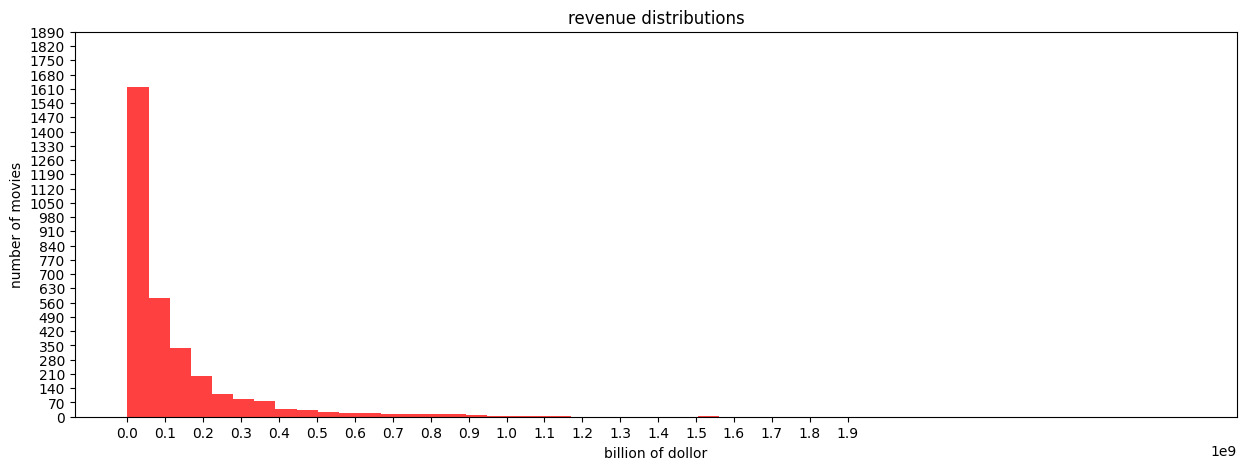

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(cleaned_data['revenue'], color='red', alpha=0.75, bins=50)
plt.xlabel('billion of dollor')
plt.ylabel('number of movies')
plt.yticks(np.arange(0,1900, step=70))
plt.xticks(np.arange(0,2000000000, step=100000000))
plt.title('revenue distributions')
plt.show()

Vote Count Distribution

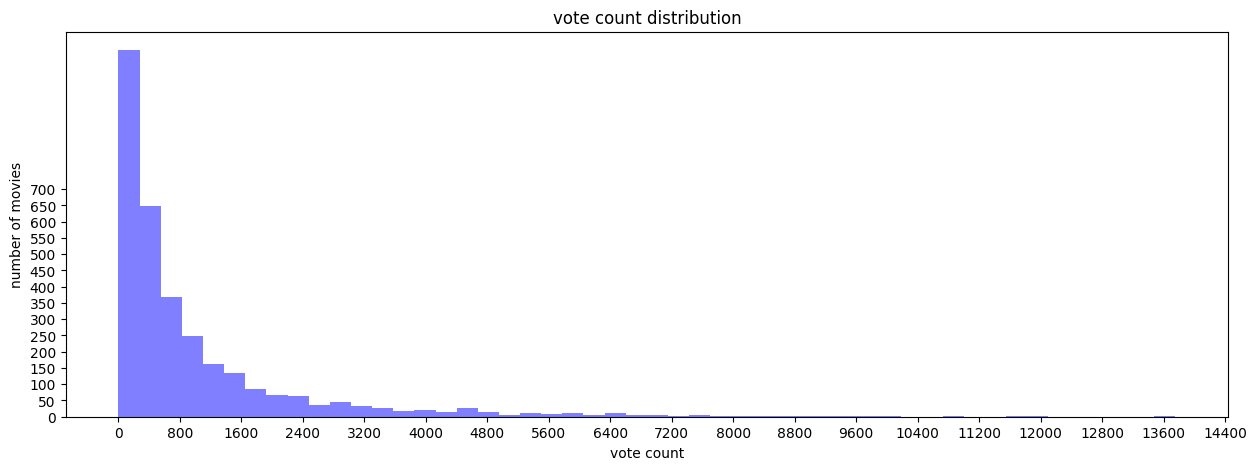

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(cleaned_data['vote_count'], color='blue', alpha=0.5, bins=50)
plt.xlabel('vote count')
plt.ylabel('number of movies')
plt.xticks(np.arange(0,15000,step=800))
plt.yticks(np.arange(0,750,step=50))
plt.title('vote count distribution')
plt.show()

Popularity Distribution

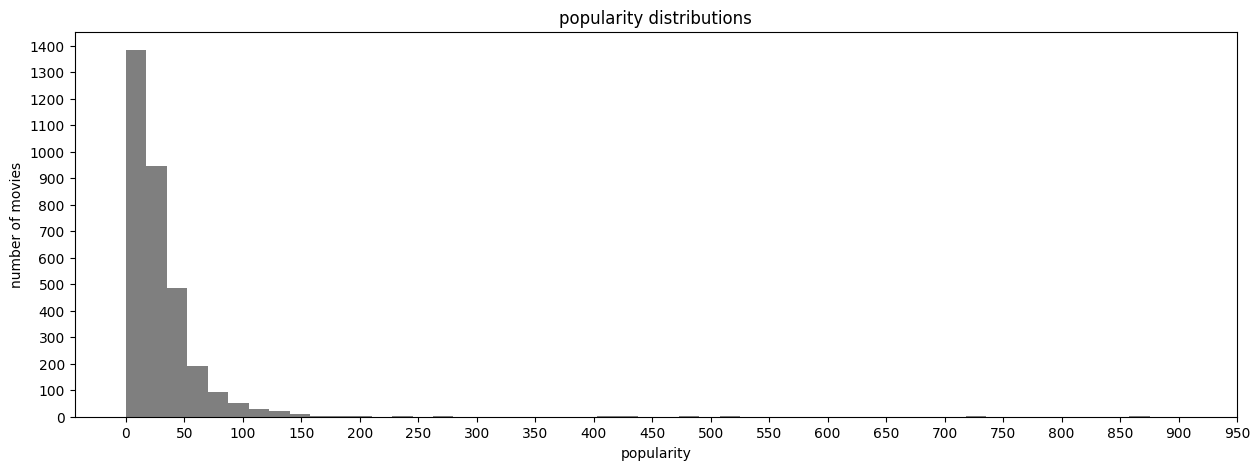

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(cleaned_data['popularity'], bins=50, color='black', alpha=0.50, )
plt.xlabel('popularity')
plt.ylabel('number of movies')
plt.xticks(np.arange(0,1000, step=50))
plt.yticks(np.arange(0,1500, step=100))
plt.title('popularity distributions')
plt.show()

Runtime Distribution

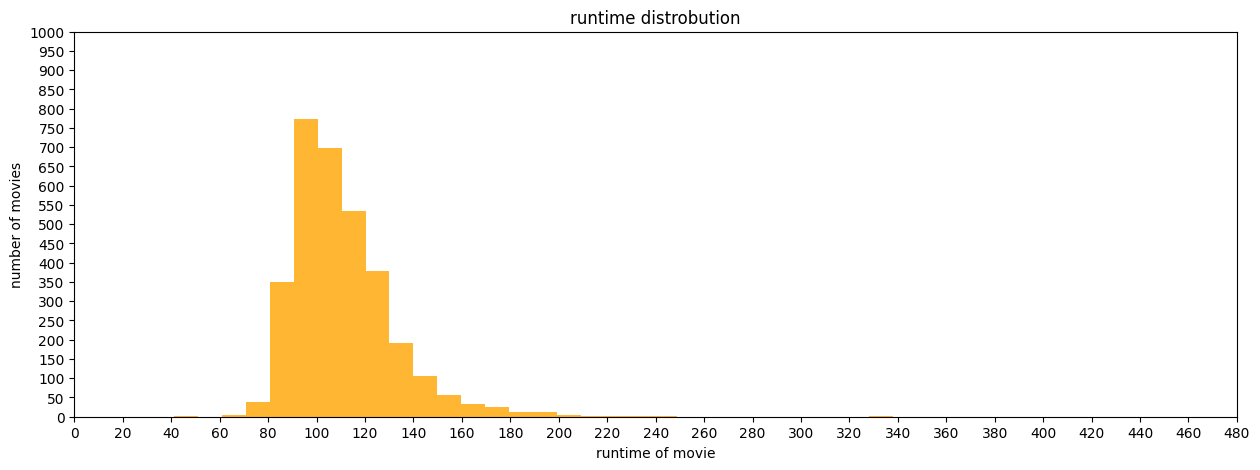

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(cleaned_data['runtime'], color = 'orange', alpha=0.8, bins = 30)
plt.xlabel('runtime of movie')
plt.ylabel("number of movies")
plt.xticks(np.arange(0, 500, step=20))
plt.yticks(np.arange(0,1050, step=50))
plt.title('runtime distrobution')
plt.show()

## Question and Answer About The Data

**Question 1: What are the genres? name the top 3 genres that movies have.**

In [30]:
genres_data = cleaned_data.explode('genres')
genres_data.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', nan], dtype=object)

In [31]:
count_genres = genres_data.groupby('genres').count()
count_genres = count_genres[['id']].sort_values(by='id', ascending=False)
count_genres.head(5)

,id
genres,
Drama,1439
Comedy,1110
Thriller,935
Action,918
Adventure,661


Now let's consider the genres with below 300 movies as new category names 'others'

In [32]:
temp = count_genres[count_genres['id'] < 300].sum()

In [33]:
count_genres.loc['others', ['id']] = temp
count_genres = count_genres[count_genres['id'] >= 300]
count_genres

,id
genres,
Drama,1439.0
Comedy,1110.0
Thriller,935.0
Action,918.0
Adventure,661.0
Romance,574.0
Crime,520.0
Science Fiction,431.0
Family,365.0


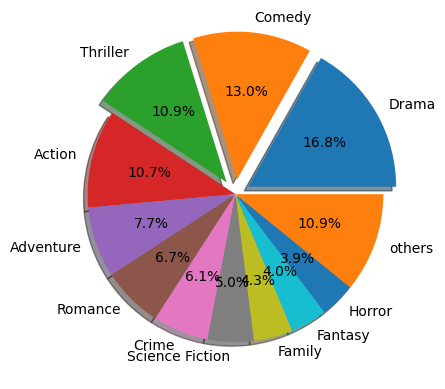

In [34]:
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots()
plt.pie(count_genres.id.values, explode=explode, labels=count_genres.index.values, autopct='%1.1f%%', startangle=0, shadow=True)
plt.show()

**Answer 1: As we can see the most used categories are: 1. Drama, 2. Comedy, 3. Thriller**

**Question 2: Which genres have the most and the least revenue?**



In [35]:
genre_revenue = cleaned_data[['genres', 'revenue']].explode('genres')
genre_revenue

,genres,revenue
0,Action,2787965087
0,Adventure,2787965087
0,Fantasy,2787965087
0,Science Fiction,2787965087
1,Adventure,961000000
...,...,...
4796,Drama,424760
4796,Thriller,424760
4798,Action,2040920
4798,Crime,2040920


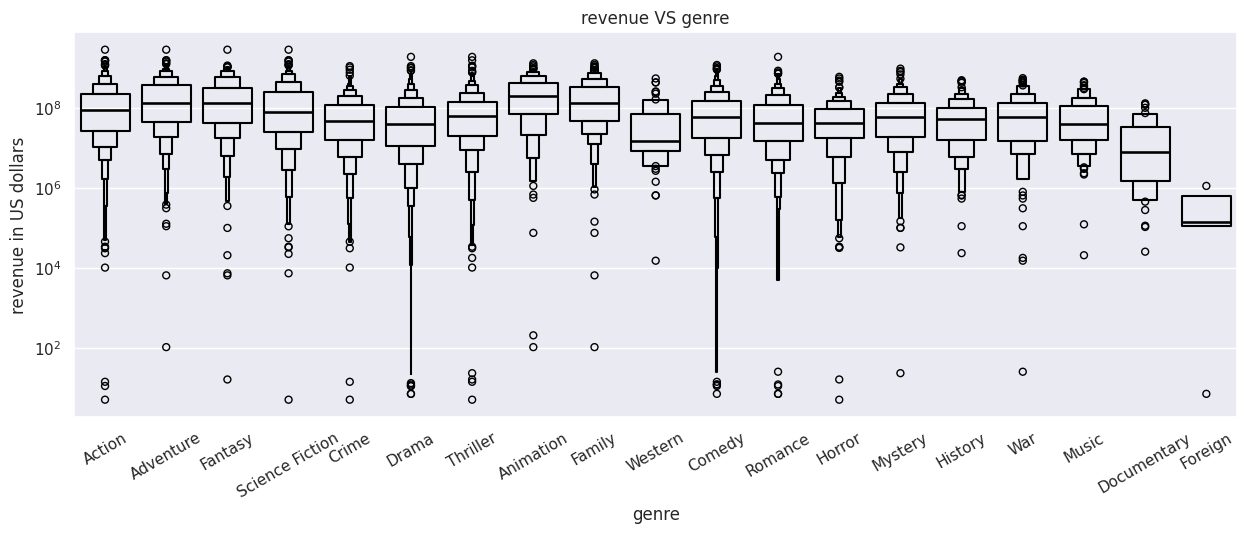

In [36]:
sns.set(style='darkgrid')
fix, ax = plt.subplots(figsize=(15,5))
sns.boxenplot(data=genre_revenue[genre_revenue['revenue'] > 0].reset_index(), x='genres', y='revenue', color='black', fill=False)
plt.xticks(rotation=30)
plt.xlabel("genre")
plt.ylabel("revenue in US dollars")
plt.yscale('log')
plt.title('revenue VS genre')
plt.show()

In this plot, we can see a distribution of each category concerning its revenue.

**Answer 2 (part 1): If we consider "Median" as a parameter that normalizes the values of each category with a number so that this number is representative of that category, we see that Animation, Fantasy and Adventure categories have the highest revenue. And Foreign, Documentary and Western have the lowest revenue.**

**We chose the median because is less sensitive to outliers.**

**But let's consider the sum of revenue as the representative parameter for each category**

In [37]:
genre_revenue = genre_revenue.groupby('genres')['revenue'].sum()
genre_revenue = genre_revenue.sort_values(ascending=False)

In [38]:
genre_revenue

genres
Adventure          163667924328
Action             162316088236
Comedy             120412094932
Drama              118116065389
Thriller           103025484249
Family              82427901052
Fantasy             81504220363
Science Fiction     81360228368
Romance             53130858198
Animation           52436463474
Crime               45797218019
Mystery             27049584035
Horror              22485437579
War                 12093445896
History             11298005011
Music                8776082899
Western              3749029619
Documentary           981584125
Foreign                 1975764
Name: revenue, dtype: int64

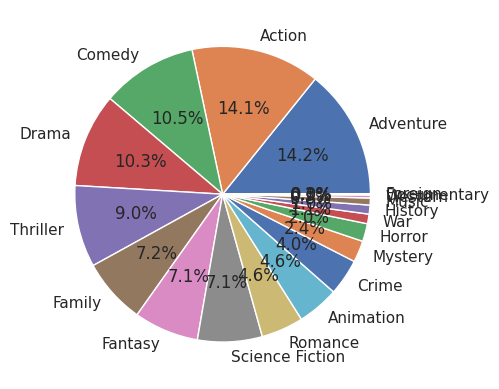

In [39]:
fig, ax = plt.subplots()
plt.pie(genre_revenue, labels=genre_revenue.index, autopct="%1.1f%%")
plt.show()

**Answer 2 (part 2): As we can see the Adventure, Action, and Comedy categories have the most revenue in total.**

**And the Western, Documentary, and Foreign have the least revenue in total.**

**Question 3: Which genres have the most and the least score?**

In [40]:
genre_score = cleaned_data[['genres', 'vote_average']]
genre_score = genre_score.explode('genres').reset_index()
genre_score.drop(['index'], axis=1, inplace=True)
genre_score

,genres,vote_average
0,Action,7.2
1,Adventure,7.2
2,Fantasy,7.2
3,Science Fiction,7.2
4,Adventure,6.9
...,...,...
8552,Drama,6.9
8553,Thriller,6.9
8554,Action,6.6
8555,Crime,6.6


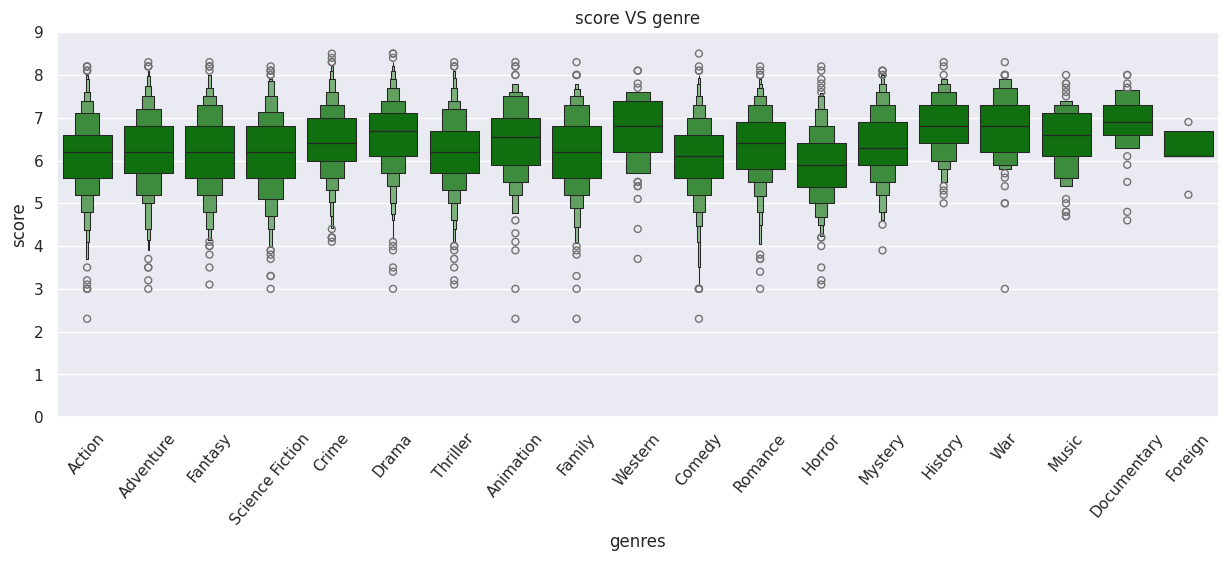

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxenplot(data=genre_score, x='genres', y='vote_average', color='green', fill=True)
plt.xticks(rotation=(50))
plt.yticks(np.arange(0,10, step=1))
plt.ylabel('score')
plt.xlabel('genres')
plt.title('score VS genre')
plt.show()

**Answer 3 (part 1): if we consider the median as our metric, we can see that Western, History, War, and Darama have the highest scores, while the Horror and Action categories have the lowest scores.**

But let's consider each category in total

In [42]:
genre_score = genre_score.groupby('genres').mean()
genre_score = genre_score.sort_values('vote_average', ascending=False)

In [43]:
genre_score

,vote_average
genres,
Documentary,6.842105
History,6.800690
War,6.792500
Western,6.671930
Drama,6.602710
Music,6.526126
Crime,6.446538
Animation,6.446277
Mystery,6.364151


In [44]:
genre_score[0:3]

,vote_average
genres,
Documentary,6.842105
History,6.800690
War,6.792500


**Answer 3 (part 2): When we consider the category's score in total concerning their average, we conclude this order for the highest score: 1. Documentary, 2. History, 3. War**

In [45]:
genre_score[-3:]

,vote_average
genres,
Action,6.129194
Comedy,6.080631
Horror,5.902410


**And this order for the lowest score: 1.Horror 2.Comedy 3.Horror**

**Question 4: Compare some of the movies' popularity with their budget**

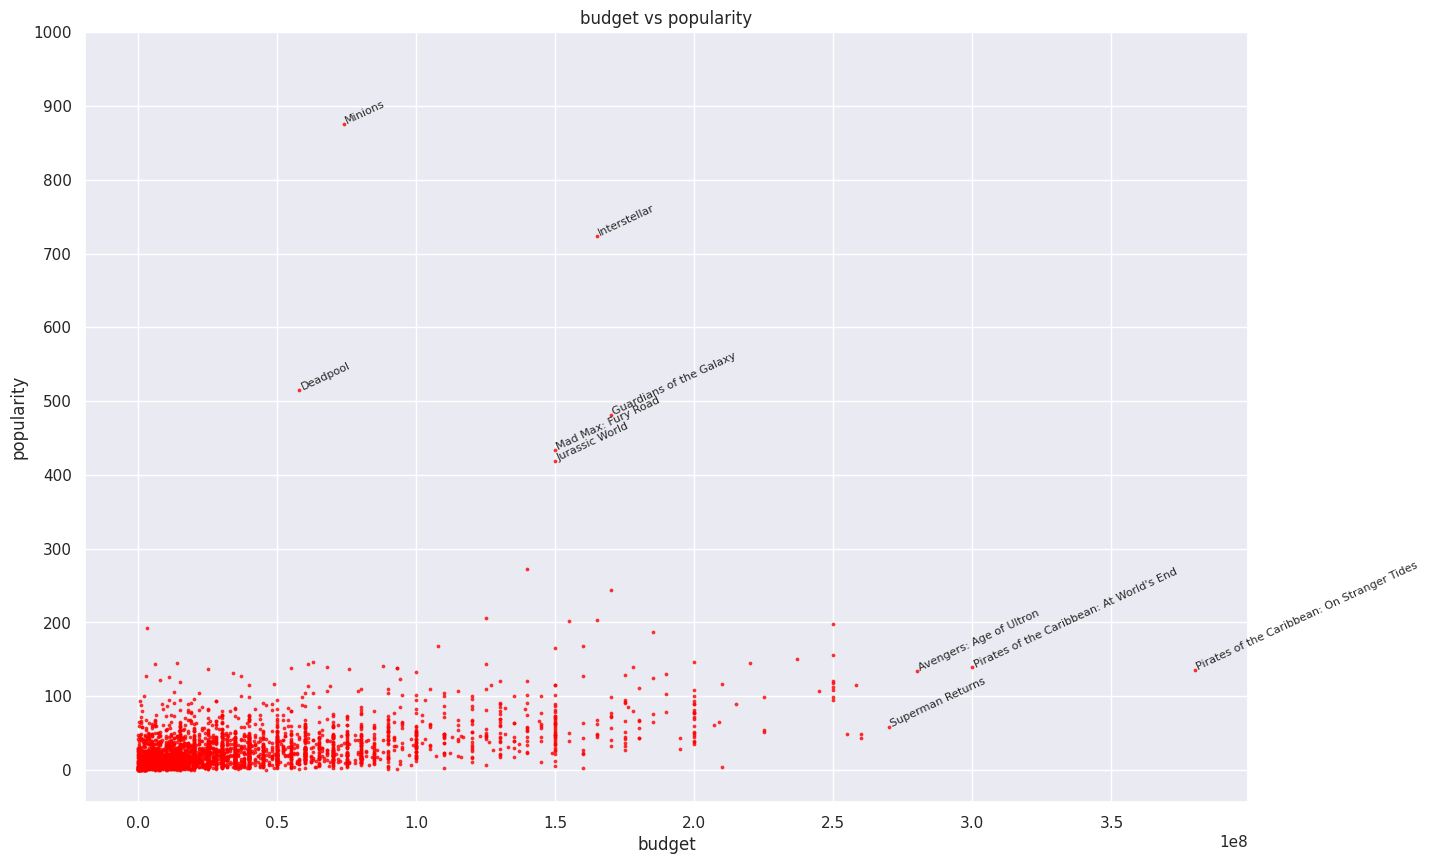

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(cleaned_data['budget'], cleaned_data['popularity'], s=3, color='red', marker='o', alpha=0.7)
plt.xlabel('budget')
plt.ylabel('popularity')
plt.yticks(np.arange(0, 1100, step=100))
plt.title('budget vs popularity')
for index, row in cleaned_data.iterrows():
  x = row['budget']
  y = row['popularity']
  if ( (260000000 < x < 500000000) or y > 400):
    plt.annotate(text=row['original_title'], xy = (x,y), fontsize=8, rotation=25)
plt.show()

**Answer 4: We visualized some of the outliers of movies concerning their budget and popularity**

**Question 5: Visualize the revenue of movies over the time**

In [47]:
revenue_timeseries = cleaned_data[['release_date', 'revenue', 'original_title']]
revenue_timeseries['release_date'] = pd.to_datetime(revenue_timeseries['release_date']).dt.year
revenue_timeseries.sort_values('release_date', inplace=True, ascending=False)
revenue_timeseries = revenue_timeseries.groupby('release_date').sum()
revenue_timeseries

<ipython-input-47-12b0098ed178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_timeseries['release_date'] = pd.to_datetime(revenue_timeseries['release_date']).dt.year
<ipython-input-47-12b0098ed178>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_timeseries.sort_values('release_date', inplace=True, ascending=False)
<ipython-input-47-12b0098ed178>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

,revenue
release_date,
1916,8394751
1925,22000000
1927,650422
1929,4358000
1930,8000000
...,...
2012,23774442705
2013,23145629922
2014,24047236072


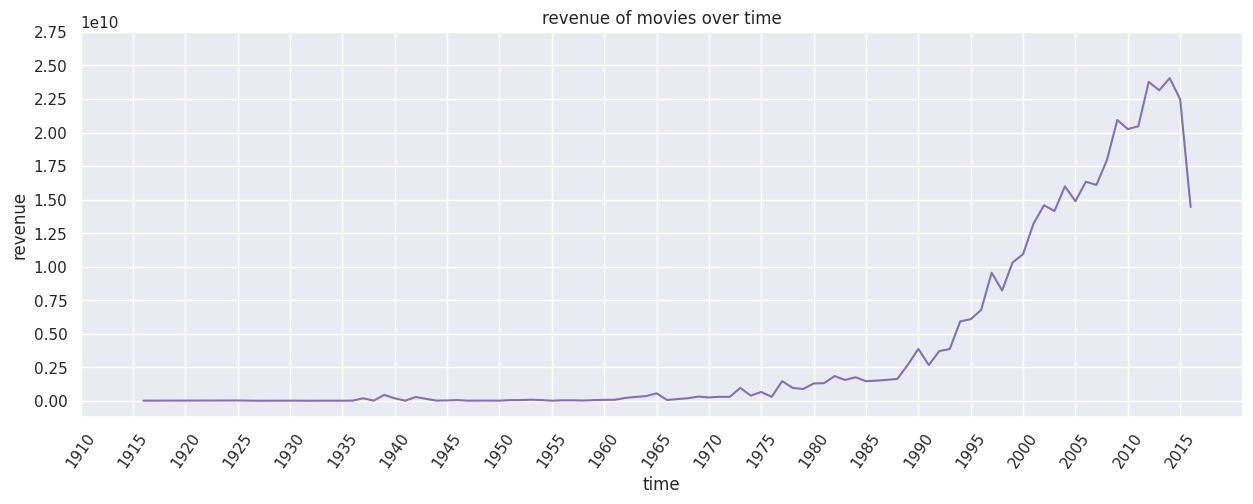

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(revenue_timeseries.index, revenue_timeseries['revenue'], color='m', animated=True)
plt.xticks(np.arange(1910, 2020, step=5), rotation=55)
plt.yticks(np.arange(0, 28000000000, step=2500000000))
plt.title('revenue of movies over time')
plt.ylabel('revenue')
plt.xlabel('time')
plt.show()

**Answer 5: It can be concluded that the revenue of movies has raised until 2014, but after that time we see revenue has a decreasing curve.**

**Question 6: What are the top 20 companies that produced movies (in number)?**

In [49]:
companies = cleaned_data[['production_companies', 'id']].explode('production_companies').reset_index()
companies.drop(['index'], axis=1, inplace=True)
companies = companies.groupby('production_companies').count()
companies = companies.sort_values('id', ascending=False)
companies = companies[:20]
companies

,id
production_companies,
Warner Bros.,280
Universal Pictures,273
Paramount Pictures,245
Twentieth Century Fox Film Corporation,201
Columbia Pictures,167
New Line Cinema,142
Relativity Media,100
Walt Disney Pictures,96
Touchstone Pictures,93


**Answer 6: Here are the top 20 companies**

Lets visualize them in a chart

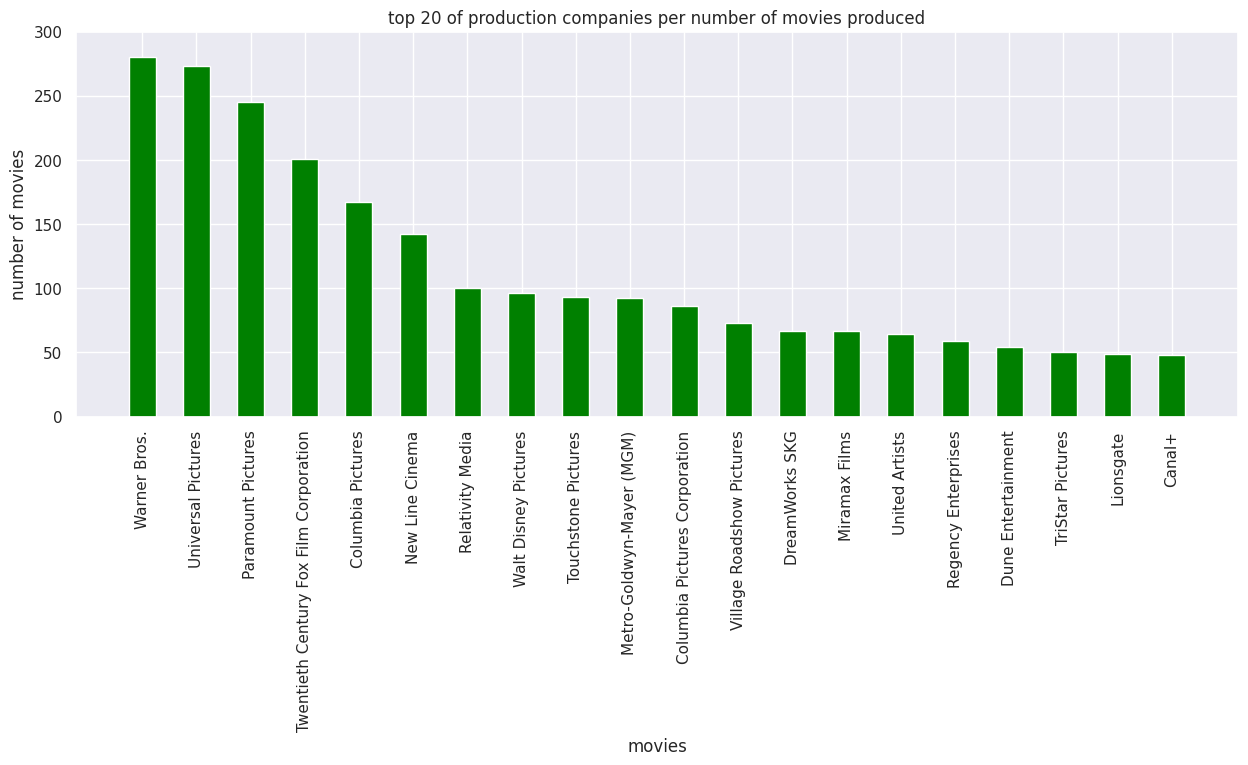

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(companies.index, companies['id'], width=0.5, align='center', color='green')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,310, step=50))
plt.title('top 20 of production companies per number of movies produced')
plt.xlabel('movies')
plt.ylabel('number of movies')
plt.show()

**Question 7: What are the top 20 companies with the highest revenue on average?**

In [51]:
revenue_company = cleaned_data[['revenue', 'production_companies']]
revenue_company = revenue_company.explode('production_companies')
revenue_company = revenue_company.groupby('production_companies').mean()
revenue_company = revenue_company.sort_values('revenue', ascending=False)
revenue_company = revenue_company[0:20]
revenue_company

,revenue
production_companies,
Québec Production Services Tax Credit,1.506249e+09
Abu Dhabi Film Commission,1.506249e+09
"Colorado Office of Film, Television & Media",1.506249e+09
Prime Focus,1.405404e+09
Vita-Ray Dutch Productions (III),1.153304e+09
Deluxe Digital Studios,1.153304e+09
Lightstorm Entertainment,1.124376e+09
Ian Bryce Productions,1.091405e+09
Second Mate Productions,1.013330e+09


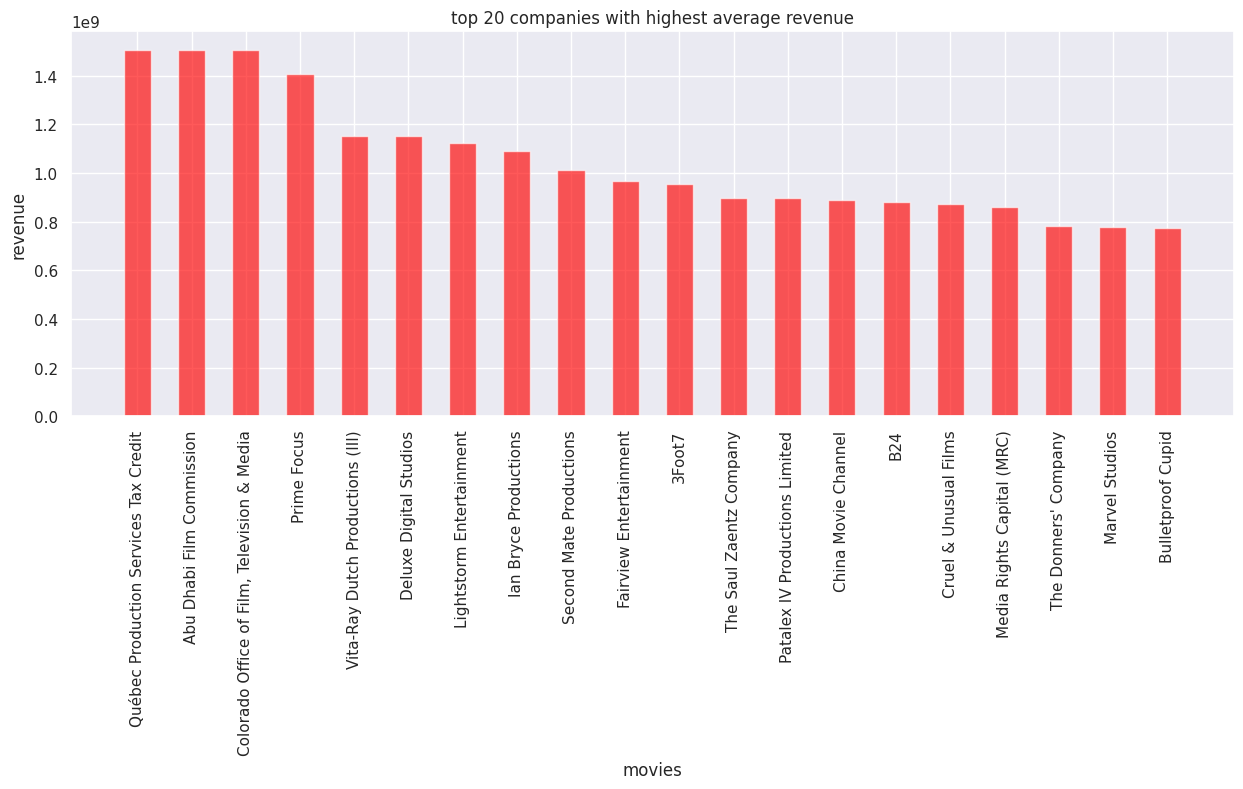

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(revenue_company.index, revenue_company['revenue'], width=0.5, color='red', alpha=0.65)
plt.xticks(rotation=90)
plt.xlabel('movies')
plt.ylabel('revenue')
plt.title('top 20 companies with highest average revenue')
plt.show()

This was my first project for the statistics and probability course. I will do more projects about this course. My goal was to implement the concepts and intuitions I learned throughout this course. Please reach me by Email if you have any questions about this notebook. Bye for now.

**Email: alirzahadipur@gmail.com**